# 1. EDA - 완료

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')
df.shape

/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_4064/222469946.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')


(666421, 29)

In [10]:
refined_df = df.drop(columns=df.columns.difference(['text', 'ratings_overall']))

<Axes: >

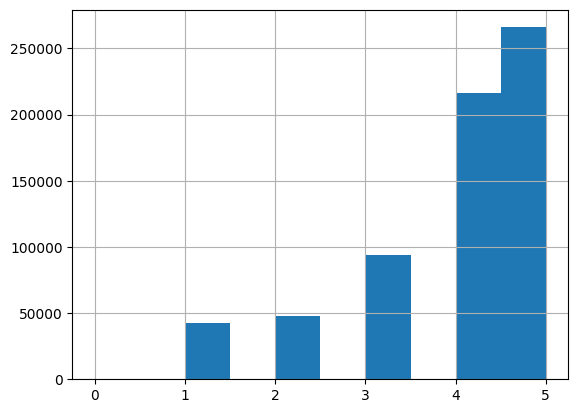

In [11]:
refined_df['ratings_overall'].hist()

In [12]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def map_ratings(value):
    if value in [1.0, 2.0, 3.0]:
        return 'low'
    elif value in [4.0, 5.0]:
        return 'high'
    else:
        return 'unknown'  # 다른 값에 대한 처리를 추가할 수도 있습니다.

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['ratings'] = refined_df['ratings_overall'].apply(map_ratings)

In [13]:
refined_df['ratings'].value_counts()

ratings
high       482500
low        183920
unknown         1
Name: count, dtype: int64

In [14]:
import pandas as pd

# 'high'와 'low'의 개수 구하기
high_count = refined_df['ratings'].value_counts()['high']
low_count = refined_df['ratings'].value_counts()['low']

# 'high'의 일부 행을 랜덤하게 삭제하여 개수를 'low'와 동일하게 만듦
refined_df_balanced = pd.concat([
    refined_df[refined_df['ratings'] == 'high'].sample(n=low_count, random_state=42),
    refined_df[refined_df['ratings'] == 'low']
])

# 결과 확인
print(refined_df_balanced['ratings'].value_counts())


ratings
high    183920
low     183920
Name: count, dtype: int64


In [15]:
import pandas as pd

# 'high'와 'low'의 개수 구하기
high_count = 10000
low_count = 10000

# 'high'와 'low'의 일부 행을 랜덤하게 추출하여 새로운 DataFrame 생성
refined_df_balanced = pd.concat([
    refined_df[refined_df['ratings'] == 'high'].sample(n=high_count, random_state=42),
    refined_df[refined_df['ratings'] == 'low'].sample(n=low_count, random_state=42)
])

# 결과 확인
print(refined_df_balanced['ratings'].value_counts())


ratings
high    10000
low     10000
Name: count, dtype: int64


In [16]:
refined_df = refined_df_balanced
refined_df.head(3)

,text,ratings_overall,ratings
631117,everyone from alby who made the reservation to...,5.0,high
507002,I stayed here for 6 nights over two consecutiv...,4.0,high
256569,Perfect location for seeing the sights in Holl...,4.0,high


In [17]:
# 'ratings_overall' 칼럼 삭제
refined_df = refined_df.drop('ratings_overall', axis=1)

# 결과 확인
print(refined_df.head())


                                                     text ratings
631117  everyone from alby who made the reservation to...    high
507002  I stayed here for 6 nights over two consecutiv...    high
256569  Perfect location for seeing the sights in Holl...    high
193612  Everything there has a golden logo of lion:tow...    high
139254  Stayed 3 nights. Absolutely great hotel. Frien...    high


# 2. 데이터 전처리

## 2.1 토큰화

In [18]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

2024-02-03 14:52:29.715340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
text = df['text'].iloc[0]
print('단어 토큰화3 :',text_to_word_sequence(text))

단어 토큰화3 : ['stayed', 'in', 'a', 'king', 'suite', 'for', '11', 'nights', 'and', 'yes', 'it', 'cots', 'us', 'a', 'bit', 'but', 'we', 'were', 'happy', 'with', 'the', 'standard', 'of', 'room', 'the', 'location', 'and', 'the', 'friendliness', 'of', 'the', 'staff', 'our', 'room', 'was', 'on', 'the', '20th', 'floor', 'overlooking', 'broadway', 'and', 'the', 'madhouse', 'of', 'the', 'fairway', 'market', 'room', 'was', 'quite', 'with', 'no', 'noise', 'evident', 'from', 'the', 'hallway', 'or', 'adjoining', 'rooms', 'it', 'was', 'great', 'to', 'be', 'able', 'to', 'open', 'windows', 'when', 'we', 'craved', 'fresh', 'rather', 'than', 'heated', 'air', 'the', 'beds', 'including', 'the', 'fold', 'out', 'sofa', 'bed', 'were', 'comfortable', 'and', 'the', 'rooms', 'were', 'cleaned', 'well', 'wi', 'fi', 'access', 'worked', 'like', 'a', 'dream', 'with', 'only', 'one', 'connectivity', 'issue', 'on', 'our', 'first', 'night', 'and', 'this', 'was', 'promptly', 'responded', 'to', 'with', 'a', 'call', 'from', '

In [20]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def tokenizer(text):
    return text_to_word_sequence(text)

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['tokens'] = refined_df['text'].apply(tokenizer)

# 결과 확인
print(refined_df)

                                                     text ratings  \
631117  everyone from alby who made the reservation to...    high   
507002  I stayed here for 6 nights over two consecutiv...    high   
256569  Perfect location for seeing the sights in Holl...    high   
193612  Everything there has a golden logo of lion:tow...    high   
139254  Stayed 3 nights. Absolutely great hotel. Frien...    high   
...                                                   ...     ...   
507812  After checking in it became all to obvious why...     low   
354066  Housekeeping stole my jewlery, manager refused...     low   
287284  We got stranded at the Philladelphia airport d...     low   
92249   Let me try to be as brief as I can. We reserve...     low   
567222  I booked a stay at the Doubletree using Hilton...     low   

                                                   tokens  
631117  [everyone, from, alby, who, made, the, reserva...  
507002  [i, stayed, here, for, 6, nights, over, two

### 2.2.3 길이가 짧은 토큰들은 제거해주기

In [21]:
refined_df['tokens'] = refined_df['tokens'].apply(lambda token_list: [word for word in token_list if len(word) > 2])

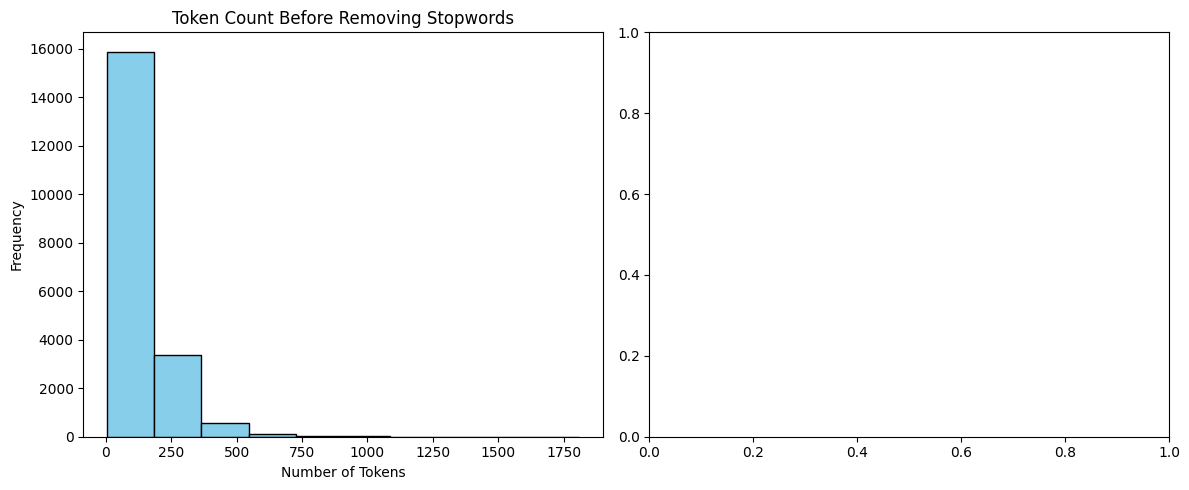

In [22]:
import matplotlib.pyplot as plt


# 불용어 제거 전의 토큰 개수
refined_df['token_count'] = refined_df['tokens'].apply(len)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 불용어 제거 전의 토큰 개수 시각화
axes[0].hist(refined_df['token_count'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Token Count Before Removing Stopwords')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.2.4 불용어 제거해주기

In [23]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK에서 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/songye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 불용어 제거

In [24]:

# NLTK에서 제공하는 불용어 리스트
stop_words = set(stopwords.words('english'))

# 'tokens' 칼럼에 있는 리스트에서 불용어 제거
refined_df['tokens'] = refined_df['tokens'].apply(lambda token_list: [word for word in token_list if word.lower() not in stop_words])


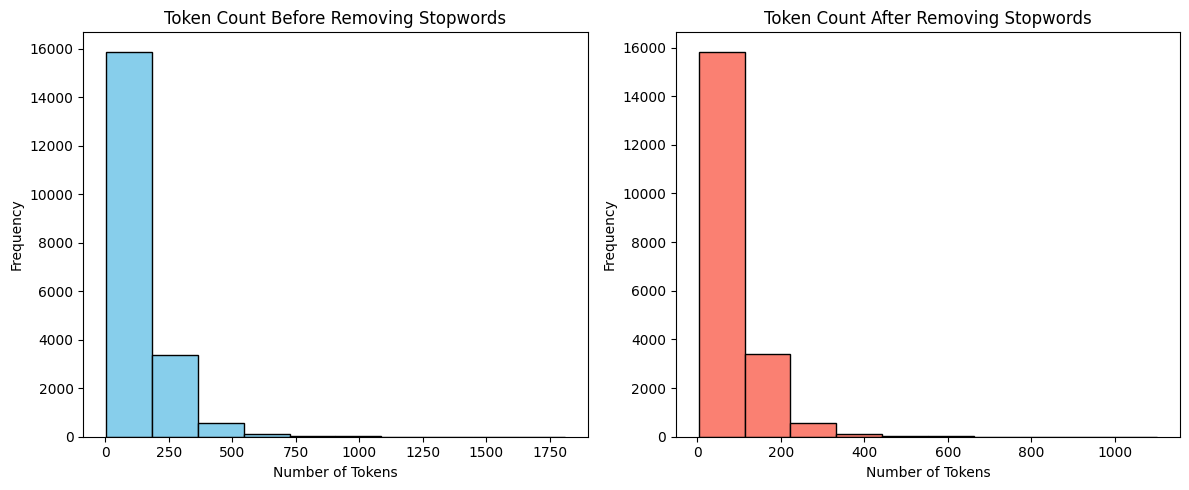

In [25]:

refined_df['token_count_after'] = refined_df['tokens'].apply(len)

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 불용어 제거 전의 토큰 개수 시각화
axes[0].hist(refined_df['token_count'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Token Count Before Removing Stopwords')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')

# 불용어 제거 후의 토큰 개수 시각화
axes[1].hist(refined_df['token_count_after'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Token Count After Removing Stopwords')
axes[1].set_xlabel('Number of Tokens')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2.2 정제 및 정규화

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# TfidfVectorizer를 사용하여 TF-IDF 행렬 생성
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(refined_df['tokens'].apply(lambda x: ' '.join(x)))

# TF-IDF 행렬을 DataFrame으로 변환 (선택사항, 확인용)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 특정 기준에 따라 단어 선택 (예: TF-IDF 값이 일정 threshold 이상인 경우)
selected_words = tfidf_df.columns[tfidf_df.mean() > 0.1]  # 예시: 평균 TF-IDF 값이 0.1 이상인 단어 선택

# 선택된 단어들로 새로운 'tokens' 칼럼 생성
refined_df['tokens_tfidf'] = refined_df['tokens'].apply(lambda x: [word for word in x if word in selected_words])


: 

In [26]:
# 토큰의 개수가 200개 미만인 비율 구하기
row_count_less_than_200 = len(refined_df[refined_df['token_count_after'] < 200])
total_rows = len(refined_df)
ratio_less_than_250_rows = row_count_less_than_200 / total_rows

# 결과 출력
print(f"비율: {ratio_less_than_250_rows:.2%}")

비율: 94.83%


In [27]:
refined_df.head(3)

,text,ratings,tokens,token_count,token_count_after
631117,everyone from alby who made the reservation to...,high,"[everyone, alby, made, reservation, deenny, gr...",37,27
507002,I stayed here for 6 nights over two consecutiv...,high,"[stayed, nights, two, consecutive, weeks, busi...",46,31
256569,Perfect location for seeing the sights in Holl...,high,"[perfect, location, seeing, sights, hollywood,...",63,41


- 과정
- 토큰화
- 시퀀스로 만들기
- 그 다음 패딩 처리
- glove로 임베딩 처리

## 2.5 패딩 처리

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# 예시 데이터 (refined_df['tokens']에 토큰이 이미 들어가 있다고 가정)
# 토큰화된 데이터가 저장된 컬럼 이름이 'tokens'일 경우:
tokenized_text = refined_df['tokens']

# 토크나이저 객체 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_text)

# 토큰들을 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(tokenized_text)

# 시퀀스 패딩
max_sequence_length = 200  # 시퀀스의 최대 길이 (임의 설정)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [29]:
padded_sequences[1]

array([  13,   63,   38, 6558,  945,   85,    9,  115,    1,   14,  148,
        366,  290,  169, 1320, 1713,   81,  506,   59,  206,   21,  240,
       2214,   17,   78,  342, 3386,   46, 1142,   55, 5902,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## 2.4 텍스트 벡터화
- Word2Vec
- GloVe
- BERT

In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import KeyedVectors

In [31]:
import torchtext.vocab

glove = torchtext.vocab.GloVe(name='6B', dim=100) # 이미 학습된 것을 불러오기만 하는 것임. torchtext의 vocab에 존재.
# hidden size를 몇으로 정할래이다. V -> hidden (100 / 300 / 512 / 256)
print(f'There are {len(glove.itos)} words in the vocabulary')
# itos -> dictionary의 사이즈가 무엇이냐는 것.
# 우리는 지금 아래와 같이 400000개의 words를 사용 가능함.

There are 400000 words in the vocabulary


In [32]:
embedding_dim = glove.vectors.shape[1]
embedding_dim

100

In [33]:
import torch
import torch.nn.functional as F

# 예시: 패딩된 시퀀스
padded_sequence = torch.tensor(padded_sequences)

# 임베딩 차원 설정
embedding_dim = 100

# 패딩된 시퀀스를 GloVe 임베딩으로 변환
embedded_sequence = F.embedding(padded_sequence, glove.vectors)


In [34]:
# X data
embedded_sequence.shape 


torch.Size([20000, 200, 100])

In [35]:
refined_df['ratings'].shape

(20000,)

In [30]:
import torch

In [31]:
torch.save(embedded_sequence, '../dataset/240128_TripAdvisorHotelReviews/feature_tensor.pt')

In [34]:
np.save('../dataset/240128_TripAdvisorHotelReviews/labels.npy', refined_df['ratings'].to_numpy())

In [2]:
# 저장된 파일 불러오기
import torch
embedded_sequence = torch.load('../dataset/240128_TripAdvisorHotelReviews/feature_tensor.pt')

# 불러온 데이터 확인
print(embedded_sequence.size())

torch.Size([100000, 200, 100])


In [38]:
labels = refined_df['ratings']

In [3]:
import numpy as np

# 저장된 파일 불러오기
labels = np.load('../dataset/240128_TripAdvisorHotelReviews/labels.npy', allow_pickle=True)

# 불러온 데이터 확인
print(labels)


['high' 'high' 'high' ... 'low' 'low' 'low']


In [39]:
import numpy as np
labels = np.array([1 if value == 'high' else 0 for value in labels])

print(labels)

[1 1 1 ... 0 0 0]


# 3. 데이터 분할

In [40]:
from sklearn.model_selection import train_test_split

# PyTorch DataLoader로 사용할 데이터셋 클래스를 정의하고 데이터를 생성하는 작업이 필요

# 예시: X는 embedded_sequence, y는 refined_df['ratings']
X_train, X_temp, y_train, y_temp = train_test_split(embedded_sequence, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 결과 확인
print("Train data shapes:", X_train.shape, y_train.shape)
print("Validation data shapes:", X_val.shape, y_val.shape)
print("Test data shapes:", X_test.shape, y_test.shape)


Train data shapes: torch.Size([14000, 200, 100]) (14000,)
Validation data shapes: torch.Size([3000, 200, 100]) (3000,)
Test data shapes: torch.Size([3000, 200, 100]) (3000,)


In [41]:
y_val.shape

(3000,)

In [7]:
import numpy as np

# 예시 데이터
dataset = {
    'X_train': X_train.numpy(),
    'y_train': y_train,
    'X_val': X_val.numpy(),
    'y_val': y_val,
    'X_test': X_test.numpy(),
    'y_test': y_test
}

# Numpy 배열로 저장
np.savez('../dataset/240128_TripAdvisorHotelReviews/train_test_dataset.npz', **dataset)


In [3]:
import numpy as np
import torch

# Numpy 배열로 저장된 데이터 불러오기
loaded_data_npz = np.load('../dataset/240128_TripAdvisorHotelReviews/train_test_dataset.npz', allow_pickle=True)

# 데이터 형식 변환
X_train = torch.Tensor(loaded_data_npz['X_train'].astype(np.float32))
y_train = torch.Tensor(loaded_data_npz['y_train'].astype(np.float32))
X_val = torch.Tensor(loaded_data_npz['X_val'].astype(np.float32))
y_val = torch.Tensor(loaded_data_npz['y_val'].astype(np.float32))
X_test = torch.Tensor(loaded_data_npz['X_test'].astype(np.float32))
y_test = torch.Tensor(loaded_data_npz['y_test'].astype(np.float32))


In [4]:
X_train.shape

torch.Size([70000, 200, 100])

# 4. 모델 선택 및 구성

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터셋을 플랫하게 펼침
X_train_flat = X_train.view(X_train.size(0), -1).numpy()
X_val_flat = X_val.view(X_val.size(0), -1).numpy()

# 5. 모델 컴파일 및 학습

In [43]:
# 모델 초기화
model = LogisticRegression()

# 모델 학습
model.fit(X_train_flat, y_train)


/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 6. 모델 평가

In [44]:
# 예측
y_pred = model.predict(X_val_flat)

# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.623


In [48]:
import numpy as np

# PyTorch 텐서를 NumPy 배열로 변환
X_numpy = X.numpy()

# 2차원 배열로 reshape
X_reshaped = X_numpy.reshape(X_numpy.shape[0], -1)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


y = y_train

# RandomForestClassifier 모델
rf_classifier = RandomForestClassifier()

# 튜닝할 하이퍼파라미터들
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# GridSearchCV를 사용하여 모델 튜닝
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_reshaped, y)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델
best_model = grid_search.best_estimator_


최적의 하이퍼파라미터: {'max_depth': None, 'n_estimators': 150}


In [51]:
# 최적 모델의 정확도 계산
best_model_accuracy = best_model.score(X_reshaped, y)
print("최적 모델의 정확도:", best_model_accuracy)


최적 모델의 정확도: 1.0


In [52]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [61]:
grid_search.cv_results_['split4_test_score']

array([0.58035714, 0.57714286, 0.59357143, 0.5825    , 0.58142857,
       0.58321429, 0.57964286, 0.58714286, 0.5875    , 0.55857143,
       0.59071429, 0.59785714])

In [62]:
X_test = X_test.numpy()

# 2차원 배열로 reshape
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [63]:
# X_test, y_test가 있다고 가정하고
best_model_accuracy = best_model.score(X_test_reshaped, y_test)
print("최적 모델의 테스트 정확도:", best_model_accuracy)


최적 모델의 테스트 정확도: 0.5993333333333334


In [65]:
y_test.shape

(3000,)

In [64]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test_reshaped)

# 다양한 평가 지표 출력
print("분류 보고서:\n", classification_report(y_test, y_pred))


분류 보고서:
               precision    recall  f1-score   support

           0       0.58      0.65      0.62      1468
           1       0.62      0.55      0.58      1532

    accuracy                           0.60      3000
   macro avg       0.60      0.60      0.60      3000
weighted avg       0.60      0.60      0.60      3000



In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 축소된 파라미터 그리드
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# 랜덤 서치 수행
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_reshaped, y)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

# 최적의 모델
best_random_model = random_search.best_estimator_

# 최적 모델의 정확도 계산
random_model_accuracy = best_random_model.score(X_test_reshaped, y_test)
print("최적 랜덤 모델의 테스트 정확도:", random_model_accuracy)


최적의 하이퍼파라미터: {'bootstrap': False, 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 51}
최적 랜덤 모델의 테스트 정확도: 0.6106666666666667


# 7. 하이퍼파라미터 튜닝